In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/Air_Quality.zip' Air_Quality.zip

In [ ]:
n
n
!unzip -q Air_Quality.zip

replace madrid_2001.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2002.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2003.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2004.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2005.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2006.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2007.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2008.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2009.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2010.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2011.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2012.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2014.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace madrid_2016.csv? 

## Exploratory Data Analysis

In [ ]:
#important library
import os
import math
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.filters.hp_filter import hpfilter
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight') 
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# merging all csv files
tr1 = pd.read_csv('/content/madrid_2001.csv',index_col='date',parse_dates=['date'])
tr2 = pd.read_csv('/content/madrid_2002.csv',index_col='date',parse_dates=['date'])
tr3 = pd.read_csv('/content/madrid_2003.csv',index_col='date',parse_dates=['date'])
tr4 = pd.read_csv('/content/madrid_2004.csv',index_col='date',parse_dates=['date'])
tr5 = pd.read_csv('/content/madrid_2005.csv',index_col='date',parse_dates=['date'])
tr6 = pd.read_csv('/content/madrid_2006.csv',index_col='date',parse_dates=['date'])
tr7 = pd.read_csv('/content/madrid_2007.csv',index_col='date',parse_dates=['date'])
tr8 = pd.read_csv('/content/madrid_2008.csv',index_col='date',parse_dates=['date'])
tr9 = pd.read_csv('/content/madrid_2009.csv',index_col='date',parse_dates=['date'])
tr10 = pd.read_csv('/content/madrid_2010.csv',index_col='date',parse_dates=['date'])
tr11 = pd.read_csv('/content/madrid_2011.csv',index_col='date',parse_dates=['date'])
tr12 = pd.read_csv('/content/madrid_2012.csv',index_col='date',parse_dates=['date'])
tr13 = pd.read_csv('/content/madrid_2013.csv',index_col='date',parse_dates=['date'])
tr14 = pd.read_csv('/content/madrid_2014.csv',index_col='date',parse_dates=['date'])
tr15 = pd.read_csv('/content/madrid_2015.csv',index_col='date',parse_dates=['date'])
tr16 = pd.read_csv('/content/madrid_2016.csv',index_col='date',parse_dates=['date'])
tr17 = pd.read_csv('/content/madrid_2017.csv',index_col='date',parse_dates=['date'])
tr18 = pd.read_csv('/content/madrid_2018.csv',index_col='date',parse_dates=['date'])

files = [tr1, tr2, tr3, tr4, tr5, tr6, tr7, tr8, tr9, tr10, tr11, tr12, tr13, tr14, tr15, tr16, tr17, tr18]
df = pd.concat(files)
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [ ]:
df.index

DatetimeIndex(['2001-08-01 01:00:00', '2001-08-01 01:00:00',
               '2001-08-01 01:00:00', '2001-08-01 01:00:00',
               '2001-08-01 01:00:00', '2001-08-01 01:00:00',
               '2001-08-01 01:00:00', '2001-08-01 01:00:00',
               '2001-08-01 01:00:00', '2001-08-01 01:00:00',
               ...
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=3808224, freq=None)

In [ ]:
df.tail()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
2018-02-01,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


In [ ]:
df.shape

(3808224, 18)

In [ ]:
# # loading all csv file names
# files = glob.glob("csvs_per_year/*.csv")
# # reading csv files
# for index,file in enumerate(files):
#     files[index] = pd.read_csv(file,index_col='date',parse_dates=['date'])
# # merging all csv files
# df = pd.concat(files)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   BEN      float64
 1   CO       float64
 2   EBE      float64
 3   MXY      float64
 4   NMHC     float64
 5   NO_2     float64
 6   NOx      float64
 7   OXY      float64
 8   O_3      float64
 9   PM10     float64
 10  PXY      float64
 11  SO_2     float64
 12  TCH      float64
 13  TOL      float64
 14  station  int64  
 15  PM25     float64
 16  NO       float64
 17  CH4      float64
dtypes: float64(17), int64(1)
memory usage: 552.0 MB


In [ ]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [ ]:
df.tail()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
2018-02-01,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


In [ ]:
descr= df.describe()
descr.loc()

In [ ]:
#summing up missing values in the data set and saving it in 'missing_count'
missing_count = df.isnull().sum()
missing_count_df = pd.DataFrame(missing_count, columns=['missing_values'])
missing_count_df

,missing_values
BEN,2766540
CO,1157212
EBE,2806500
MXY,3492809
NMHC,2722912
NO_2,21174
NOx,1431949
OXY,3492529
O_3,816492
PM10,946969


In [ ]:
#Presenting percentage of data points, missing in each feature
string_percentage = []
float_percentage =[]
for key,value in missing_count.items():
    percent_missing = (value/3808224)*100
    float_percentage.append(percent_missing)
    string_percentage.append(str(percent_missing)+'%')
missing_df = pd.DataFrame(index = missing_count.keys(), columns=['Percentage_missing'])
missing_df['Percentage_missing']= string_percentage
missing_df

,Percentage_missing
BEN,72.64646197282512%
CO,30.387183106876066%
EBE,73.69576999672289%
MXY,91.71753027132857%
NMHC,71.50083608527228%
NO_2,0.556007209659936%
NOx,37.60149087868781%
OXY,91.7101777626526%
O_3,21.440230406614738%
PM10,24.866420672733536%


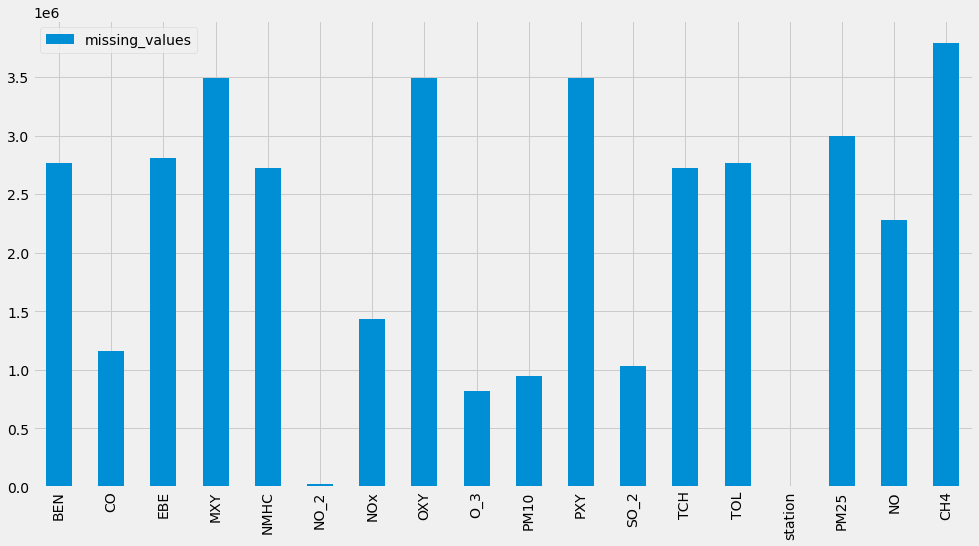

In [ ]:
#Plotting the amount of missing data points in the dataset
plt.style.use('fivethirtyeight')
missing_count_df.plot(kind='bar',figsize=(15,8))

In [ ]:
#filling missing data with closest data point after 
df_ffill = df.fillna(method='ffill')
#filling missing data with closest data point before
df_bfill = df.fillna(method='bfill')

In [ ]:
df_ffill.isnull().sum()

BEN              1
CO               0
EBE              1
MXY              1
NMHC             1
NO_2             0
NOx              0
OXY              1
O_3              0
PM10             0
PXY              1
SO_2             0
TCH              1
TOL              1
station          0
PM25        679152
NO         2268864
CH4        3616465
dtype: int64

In [ ]:
df_bfill.isnull().sum()

BEN              5
CO               3
EBE              5
MXY        1556880
NMHC             5
NO_2             0
NOx              0
OXY        1556880
O_3              0
PM10             0
PXY        1556880
SO_2             3
TCH              5
TOL              5
station          0
PM25             4
NO               0
CH4              5
dtype: int64

In [ ]:
df_drop= df.dropna()
df_drop.shape

(0, 18)

### Inference
<p> We can see that simply replacing the missing values with the nearest datapoints does not completely solve our missing data problem. In addition dropping the rows with missing data causes a total loss of the entire data. we cannot simply replace missing values with random figures like 0 or 1 in other to avoid too great an influence on our data or setting up a kind of data bias.</p>
<p> The following strategy shall be used to handle our missing data;</p>
<ol>
    <li> Features with more than 72% missing data will be dropped. This is because the amount of known data points in these fearures is negligible compared to the amount of missing data. Imputing these values will lead to a huge bias in the data.</li>
    <li> Missing values in other features will be replaced with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
</ol>

In [ ]:
#Removing features with more than 72% NAN entries
df_copy = df.copy()
missing_dict = dict(zip(missing_count.keys(),float_percentage))
for key,value in missing_dict.items():
    if value > 72:
        df_copy.drop(key,inplace=True, axis= 1)
df_copy.shape

(3808224, 10)

In [ ]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [ ]:
df.columns.nunique()

18

In [ ]:
df_copy.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,NaN,58.400002,87.150002,34.529999,105.000000,6.34,NaN,28079001,NaN
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,NaN
2001-08-01 01:00:00,0.28,NaN,50.660000,61.380001,46.310001,100.099998,7.85,NaN,28079003,NaN
2001-08-01 01:00:00,0.47,NaN,69.790001,73.449997,40.650002,69.779999,6.46,NaN,28079004,NaN
2001-08-01 01:00:00,0.39,NaN,22.830000,24.799999,66.309998,75.180000,8.80,NaN,28079039,NaN


In [ ]:
df_copy_missing_dict = df_copy.isnull().sum()
df_copy_missing_dict

CO         1157212
NMHC       2722912
NO_2         21174
NOx        1431949
O_3         816492
PM10        946969
SO_2       1032264
TCH        2721783
station          0
NO         2275827
dtype: int64

In [ ]:
df_copy_missing_dict.keys()

Index(['CO', 'NMHC', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TCH', 'station',
       'NO'],
      dtype='object')

In [ ]:
#Replacing missing data in each column with the feature's median value and storing in a new variable 'clean_df'
clean_df = df_copy.copy()
for feature in df_copy_missing_dict.keys():
    clean_df[feature].fillna(clean_df[feature].median(),inplace=True)
clean_df.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,28079001,6.0
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,6.0
2001-08-01 01:00:00,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,28079003,6.0
2001-08-01 01:00:00,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,28079004,6.0
2001-08-01 01:00:00,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,28079039,6.0


In [ ]:
clean_df.columns.nunique()

10

In [ ]:
#Checking to confirm if missing values have been addressed
clean_df.isnull().sum()

CO         0
NMHC       0
NO_2       0
NOx        0
O_3        0
PM10       0
SO_2       0
TCH        0
station    0
NO         0
dtype: int64

## Where are the stations located?

In [ ]:
# reading of the station file
stations = pd.read_csv('/content/stations.csv')
stations.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [ ]:
locations  = stations[['lat', 'lon']]
locationlist = locations.values.tolist()

popup = stations[['name']]

import folium
map_osm = folium.Map(location=[40.44, -3.69],
                    # tiles='Stamen Toner',
                     zoom_start=11) 

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=popup.iloc[point,0]).add_to(map_osm)
    
map_osm

##How do different gases correlate their levels?

In [ ]:
df_corr_gasses = clean_df.corr()
df_corr_gasses


,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
CO,1.000000,0.337564,0.556514,0.786679,-0.370648,0.503665,0.645209,0.321402,-0.132313,0.077260
NMHC,0.337564,1.000000,0.261858,0.357903,-0.158480,0.243663,0.264271,0.697919,-0.001119,0.025307
NO_2,0.556514,0.261858,1.000000,0.701569,-0.527747,0.504799,0.450349,0.300733,-0.192338,0.330826
NOx,0.786679,0.357903,0.701569,1.000000,-0.425470,0.587734,0.595073,0.369897,-0.141597,0.033232
O_3,-0.370648,-0.158480,-0.527747,-0.425470,1.000000,-0.207384,-0.299471,-0.211049,0.098467,-0.169833
PM10,0.503665,0.243663,0.504799,0.587734,-0.207384,1.000000,0.388756,0.264119,-0.113616,0.021643
SO_2,0.645209,0.264271,0.450349,0.595073,-0.299471,0.388756,1.000000,0.263468,-0.146004,-0.002055
TCH,0.321402,0.697919,0.300733,0.369897,-0.211049,0.264119,0.263468,1.000000,-0.012319,0.050083
station,-0.132313,-0.001119,-0.192338,-0.141597,0.098467,-0.113616,-0.146004,-0.012319,1.000000,0.053106
NO,0.077260,0.025307,0.330826,0.033232,-0.169833,0.021643,-0.002055,0.050083,0.053106,1.000000


##The Trend of different gasses.

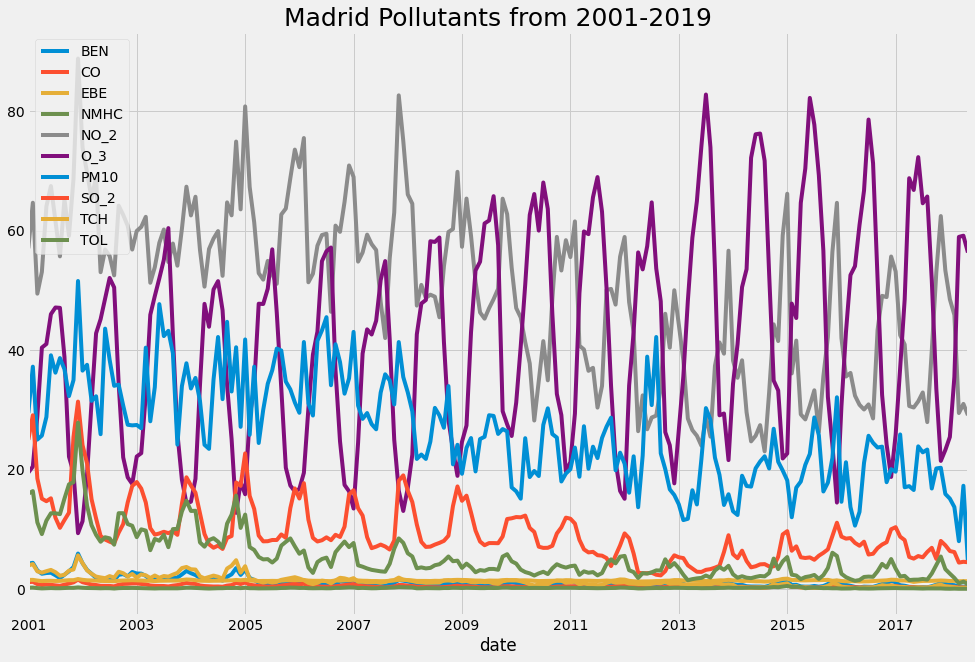

In [ ]:
# We have 10 features remaining as a result of drop due to nan
col_list = ['BEN', 'CO', 'EBE', 'NMHC', 'NO_2', 'O_3', 'PM10', 'SO_2', 'TCH', 'TOL']
monthly_df = df.resample('M').mean()
daily_df = df.resample('D').mean()

plt_monthly = monthly_df[col_list]
plt_monthly.plot(figsize=(15, 10))
plt.title('Madrid Pollutants from 2001-2018', fontsize=25)
plt.legend(loc='upper left')
plt.show()

Lets focus on Ozone.

O_3 ozone level measured in μg/m³.
High levels can produce asthma, bronchytis or other chronic pulmonary diseases in sensitive groups or outdoor workers.
Tropospheric “bad” ozone Source
Although ozone high up in the stratosphere provides a shield to protect life on Earth, direct contact with ozone is harmful to both plants and animals (including humans). Ground-level, “bad,” ozone forms when nitrogen oxide gases from vehicle and industrial emissions react with volatile organic compounds (carbon-containing chemicals that evaporate easily into the air, such as paint thinners). In the troposphere near the Earth’s surface, the natural concentration of ozone is about 10 parts per billion (0.000001 percent). According to the Environmental Protection Agency, exposure to ozone levels of greater than 70 parts per billion for 8 hours or longer is unhealthy. Such concentrations occur in or near cities during periods where the atmosphere is warm and stable. The harmful effects can include throat and lung irritation or aggravation of asthma or emphysema.

Concentration
Source

concentration (ppb) = 24.45 x concentration (ug/m3) ÷ molecular weight

for  O3=48g/mol 

Eight-Hour Average Ozone Concentrations
Source

Based on extensive scientific evidence about the effects of ozone on public health and welfare, on October 1, 2015, EPA strengthened the ground-level ozone standard to 0.070 ppm, averaged over an 8-hour period. This standard is met at an air quality monitor when the 3-year average of the annual fourth-highest daily maximum 8-hour average ozone concentration is less than or equal to 0.070 ppm.

In [ ]:
#
New_file = df.reset_index()
New_file.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [ ]:
cols = ['date', 'station', 'O_3']
o3 = New_file[cols]

o3['date'] = pd.to_datetime(o3['date'])
o3['ppb'] = 24.45*o3['O_3'] /48

o3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,station,O_3,ppb
0,2001-08-01 01:00:00,28079001,34.529999,17.588718
1,2001-08-01 01:00:00,28079035,42.160000,21.475250
2,2001-08-01 01:00:00,28079003,46.310001,23.589157
3,2001-08-01 01:00:00,28079004,40.650002,20.706095
4,2001-08-01 01:00:00,28079039,66.309998,33.776655


In [ ]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

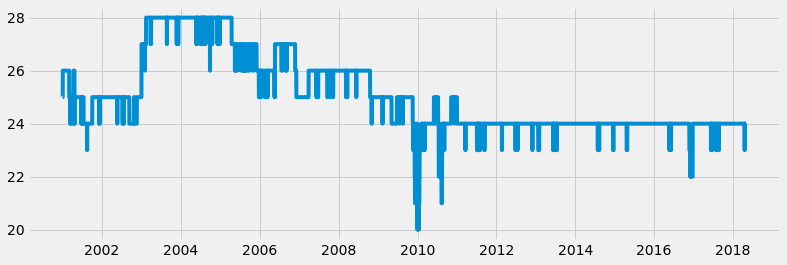

In [ ]:
# active stations with time
plt.plot(o3.groupby(['date']).station.nunique());

In [ ]:
stations[stations.id == top3.index[0]]

NameError: ignored

In [ ]:
# Calculate Eight-Hour Average Ozone Concentrations
o3_station['ppb_rolling'] = o3_station['ppb'].rolling(8).mean()

del o3_station['station']
del o3_station['O_3']
del o3_station['ppb']

o3_station = o3_station.sort_values("date")

o3_station.columns = ['ds', 'y']
o3_station.set_index('ds', inplace=True)

# Resample to daily max
o3_station = o3_station.resample('D', how='max')

# Any missing dates?
d = pd.DataFrame(pd.date_range(start= o3_station.index.min(), end= o3_station.index.max(), freq='D'))   

o3_station.reset_index(level=0, inplace=True)
o3_station = d.join(o3_station)
del o3_station['ds']

NameError: ignored